In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Business Case</h3>
<ul>
<li>Highest destination with claims</li>
<li>Does flight duration affect claims</li>
<li>Highest Product purchased</li>
<li>Highest product with claims</li>
<li>Does Age affect claims</li>
</ul>

In [2]:
df = pd.read_csv('./travel insurance.csv', na_values=0)

In [3]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,81.0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,71.0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,-49.5,29.70,NaN,32.0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,-39.6,23.76,NaN,32.0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,-19.8,11.88,NaN,41.0
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111.0,JAPAN,35.0,12.25,M,31.0
63322,JZI,Airlines,Online,Basic Plan,No,58.0,CHINA,40.0,14.00,F,40.0
63323,JZI,Airlines,Online,Basic Plan,No,2.0,MALAYSIA,18.0,6.30,M,57.0
63324,JZI,Airlines,Online,Basic Plan,No,3.0,VIET NAM,18.0,6.30,M,63.0


In [4]:
df['Claim'].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [5]:
df['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [6]:
df['Distribution Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [7]:
df['Destination'].value_counts()

SINGAPORE                 13255
MALAYSIA                   5930
THAILAND                   5894
CHINA                      4796
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63265 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             61442 non-null  float64
 8   Commision (in value)  28109 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63324 non-null  float64
dtypes: float64(4), object(7)
memory usage: 5.3+ MB


In [9]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63265.000000,61442.000000,28109.000000,63324.000000
mean,49.364625,41.950067,22.100663,39.971243
std,101.829103,49.058127,24.738303,14.015431
min,-2.000000,-389.000000,0.020000,1.000000
25%,9.000000,19.800000,7.700000,35.000000
50%,22.000000,28.000000,12.250000,36.000000
75%,53.000000,49.500000,29.130000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


<h2>Analysis Questions</h2>
<h3>Highest destination with claims</h3>

In [10]:
def claim(x):
    if x == "Yes":
        return 1
    else:
        return 0
df['Claim'] = df['Claim'].apply(claim)

In [11]:
highest_destination = df.groupby('Destination')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)

In [12]:
highest_destination

,Claim
Destination,
SINGAPORE,562
CHINA,46
AUSTRALIA,38
UNITED STATES,37
THAILAND,34
MALAYSIA,23
UNITED KINGDOM,16
"KOREA, REPUBLIC OF",15
HONG KONG,15


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Maximun number of claims per Destination')

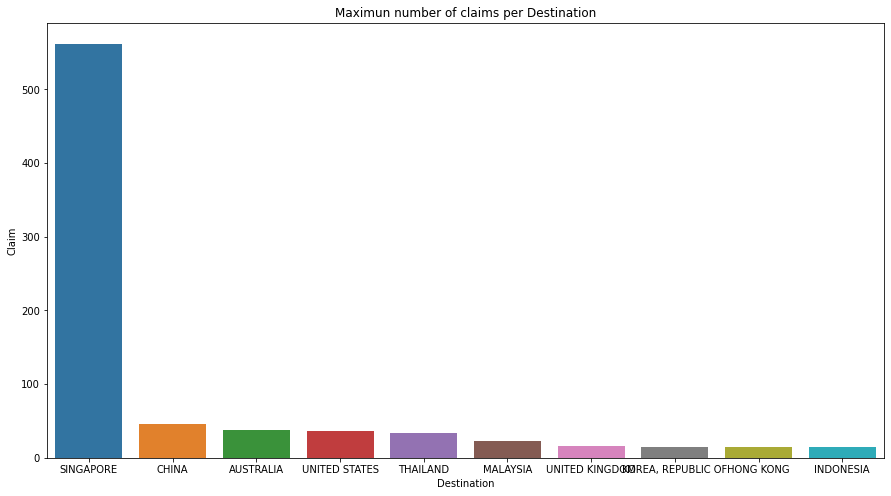

In [13]:
plt.figure(figsize=[15,8])
sns.barplot(highest_destination.index,highest_destination['Claim'])
plt.title('Maximun number of claims per Destination')

<h2>Does flight duration affect claims</h2>

In [14]:
highest_duration = df.groupby('Duration')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)

In [15]:
highest_duration

,Claim
Duration,
365.0,50
10.0,28
364.0,26
8.0,23
12.0,21
6.0,20
11.0,20
9.0,20
14.0,18


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Maximun number of claims per Duration')

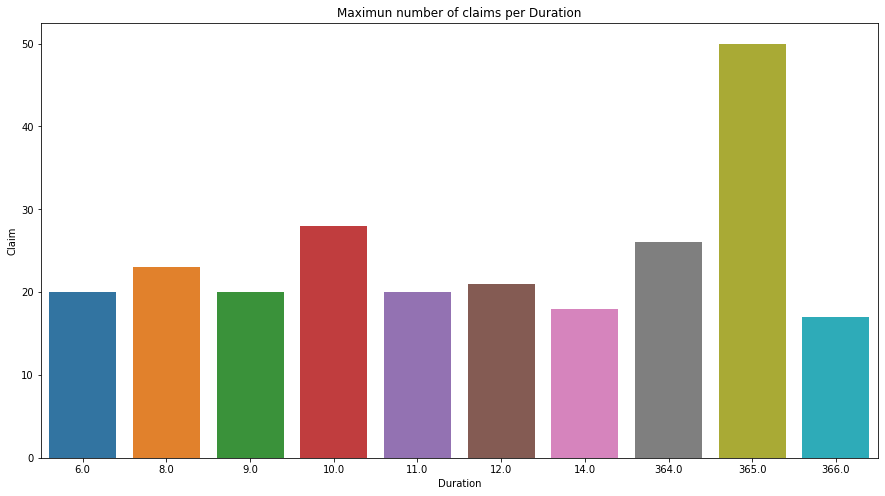

In [16]:
plt.figure(figsize=[15,8])
sns.barplot(highest_duration.index,highest_duration['Claim'])
plt.title('Maximun number of claims per Duration')

<h2>Most Product Purchased</h2>

In [17]:
def channel(x):
    if x == 'Online':
        return 1
    else:
        return 0
df['Distribution Channel'] = df['Distribution Channel'].apply(channel)

In [18]:
distribution_claim = df.groupby('Distribution Channel')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)

In [19]:
distribution_claim

,Claim
Distribution Channel,
1,910
0,17


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution channels with highest claims')

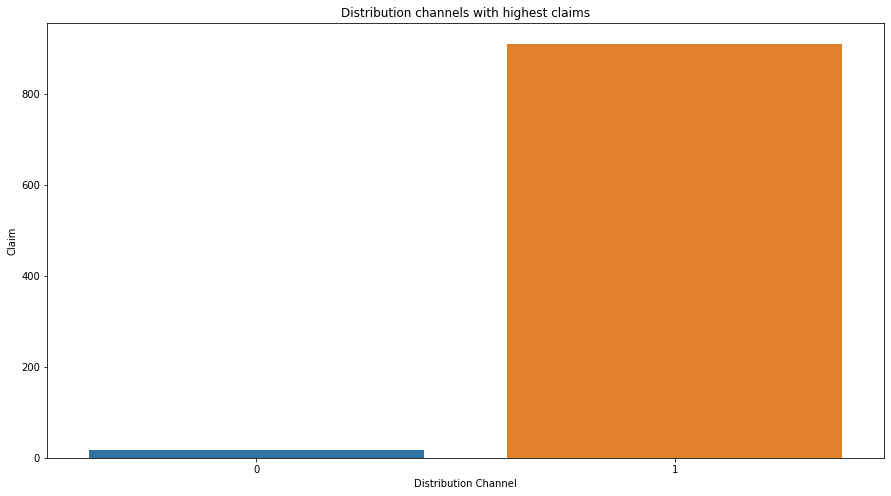

In [20]:
plt.figure(figsize=[15,8])
sns.barplot(distribution_claim.index,distribution_claim['Claim'])
plt.title('Distribution channels with highest claims')

<h2>Most Product purchased</h2>

In [21]:
most_product = df.value_counts('Product Name').head(10)

In [22]:
most_product

Product Name
Cancellation Plan                  18630
2 way Comprehensive Plan           13158
Rental Vehicle Excess Insurance     8580
Basic Plan                          5469
Bronze Plan                         4049
1 way Comprehensive Plan            3331
Value Plan                          2715
Silver Plan                         2249
Annual Silver Plan                  1423
Ticket Protector                    1056
dtype: int64

c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Maximum Products Sold')

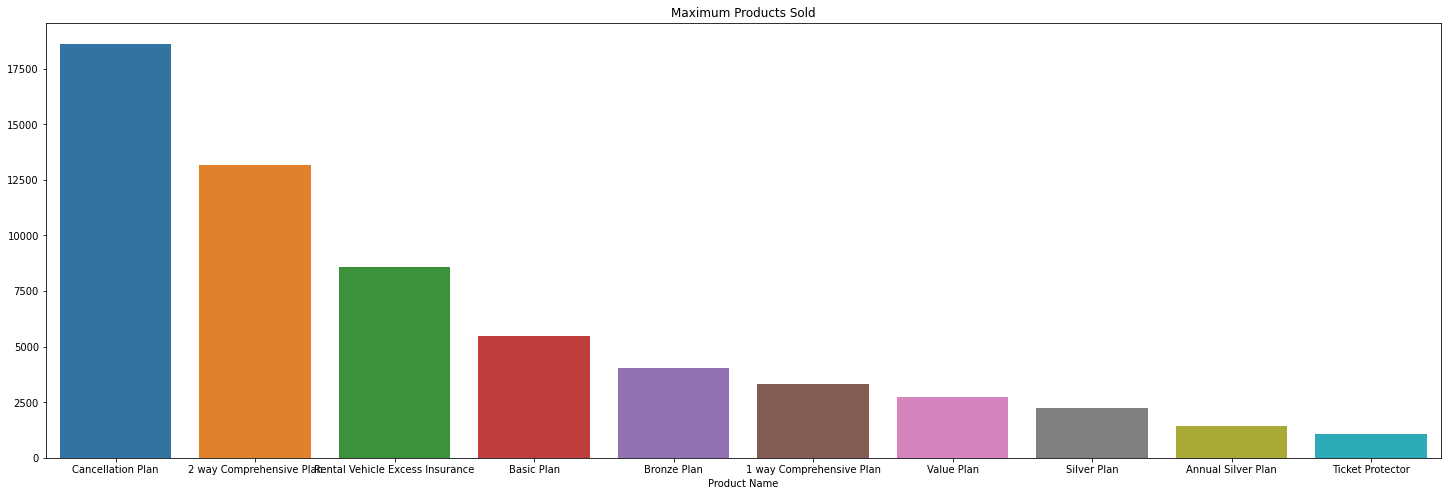

In [23]:
plt.figure(figsize=[25,8])
sns.barplot(most_product.index,most_product)
plt.title('Maximum Products Sold')

<h2>Highest product with claims</h2>

In [24]:
highest_product = df.groupby('Product Name')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)

In [25]:
highest_product

,Claim
Product Name,
Bronze Plan,210
Annual Silver Plan,157
2 way Comprehensive Plan,142
Silver Plan,141
Rental Vehicle Excess Insurance,86
Cancellation Plan,44
Basic Plan,23
Annual Gold Plan,21
Value Plan,19


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Product with Claims')

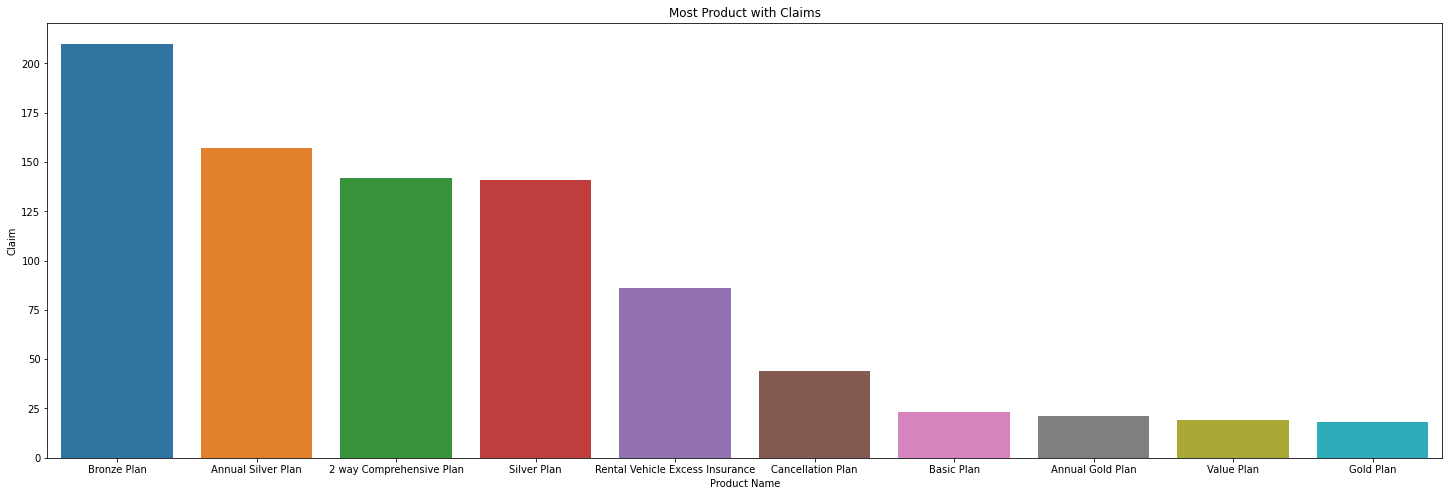

In [26]:
plt.figure(figsize=[25,8])
sns.barplot(highest_product.index,highest_product['Claim'])
plt.title('Most Product with Claims')

<h2>Does Age affect claims</h2>

In [27]:
age_claim = df.groupby('Age')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)

In [28]:
age_claim

,Claim
Age,
36.0,160
30.0,47
31.0,45
28.0,42
32.0,34
35.0,31
26.0,30
29.0,29
27.0,28


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Product with Claims')

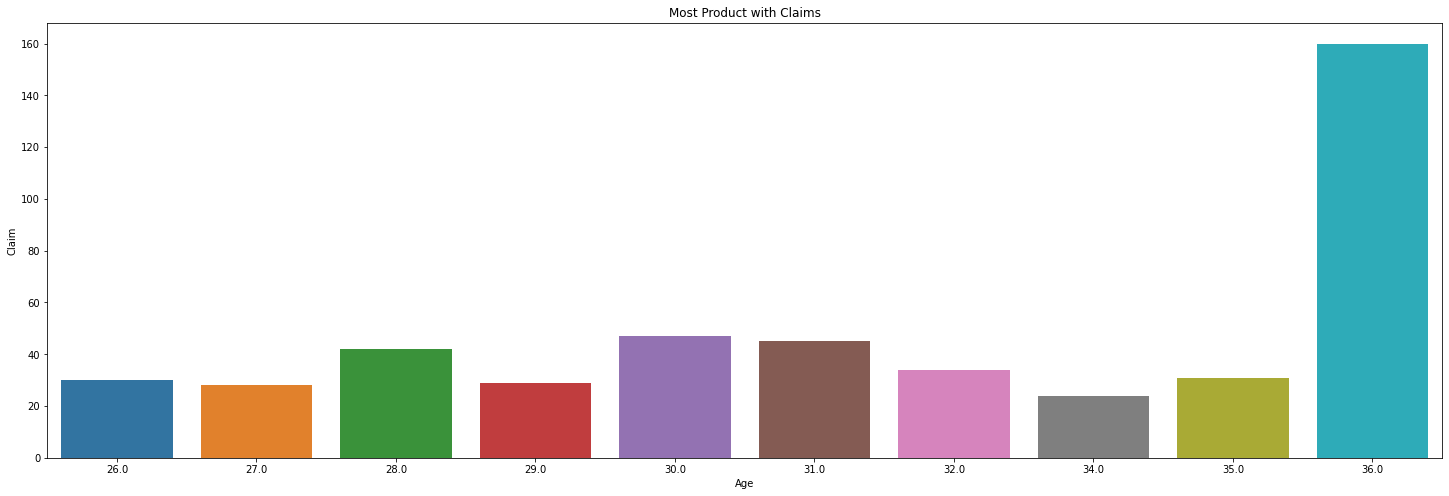

In [29]:
plt.figure(figsize=[25,8])
sns.barplot(age_claim.index,age_claim['Claim'])
plt.title('Most Product with Claims')

<AxesSubplot:>

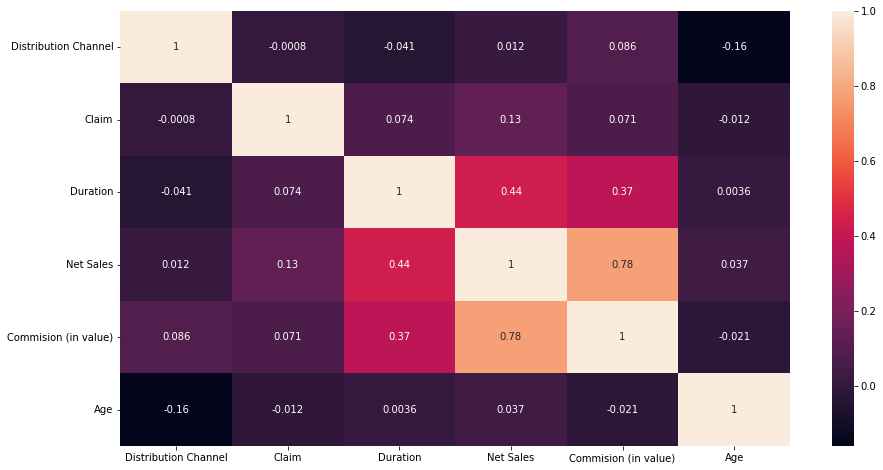

In [30]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

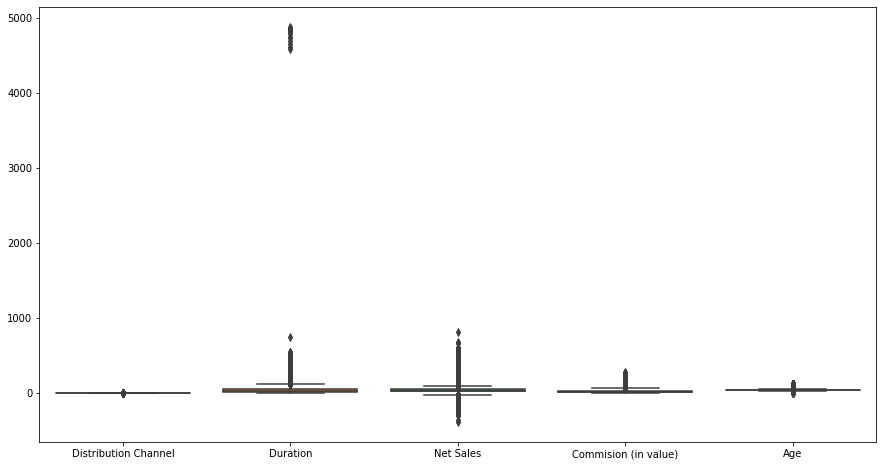

In [31]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df.drop(columns='Claim'))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  int64  
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  int64  
 5   Duration              63265 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             61442 non-null  float64
 8   Commision (in value)  28109 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63324 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


In [33]:
df.describe()

,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63265.000000,61442.000000,28109.000000,63324.000000
mean,0.982519,0.014639,49.364625,41.950067,22.100663,39.971243
std,0.131056,0.120102,101.829103,49.058127,24.738303,14.015431
min,0.000000,0.000000,-2.000000,-389.000000,0.020000,1.000000
25%,1.000000,0.000000,9.000000,19.800000,7.700000,35.000000
50%,1.000000,0.000000,22.000000,28.000000,12.250000,36.000000
75%,1.000000,0.000000,53.000000,49.500000,29.130000,43.000000
max,1.000000,1.000000,4881.000000,810.000000,283.500000,118.000000


<h2>Handle Negative Values</h2>

In [34]:
df[['Duration','Net Sales', 'Commision (in value)', 'Age']] = abs(df[['Duration','Net Sales', 'Commision (in value)', 'Age']])

<h2>Handle Missing Values</h2>
<h3>Drop Gender Column</h3>

In [35]:
df.drop(columns='Gender', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  int64  
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  int64  
 5   Duration              63265 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             61442 non-null  float64
 8   Commision (in value)  28109 non-null  float64
 9   Age                   63324 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.8+ MB


<h3>Fill Missing Values for Duration, Net Sales and Age Using Median</h3>
<h3>Drop Commission (in value)</h3>

In [37]:
df['Duration'] = df['Duration'].fillna(df['Duration'].median())
df['Net Sales'] = df['Net Sales'].fillna(df['Net Sales'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop(columns='Commision (in value)', inplace= True)

<h2>Handling Outliers</h2>

In [38]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
0,CBH,Travel Agency,0,Comprehensive Plan,0,186.0,MALAYSIA,29.0,81.0
1,CBH,Travel Agency,0,Comprehensive Plan,0,186.0,MALAYSIA,29.0,71.0
2,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,65.0,AUSTRALIA,49.5,32.0
3,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,60.0,AUSTRALIA,39.6,32.0
4,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,79.0,ITALY,19.8,41.0


In [39]:
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,['Duration','Net Sales', 'Age'])
ouliers_percentage = len(index)/len(df)*100
ouliers_percentage

23.191106338628682

In [40]:
for col in df[['Duration','Net Sales', 'Age']]:
    index = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[index] = col_median

C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_11828\3769443842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[index] = col_median
C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_11828\3769443842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[index] = col_median
C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_11828\3769443842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

<AxesSubplot:>

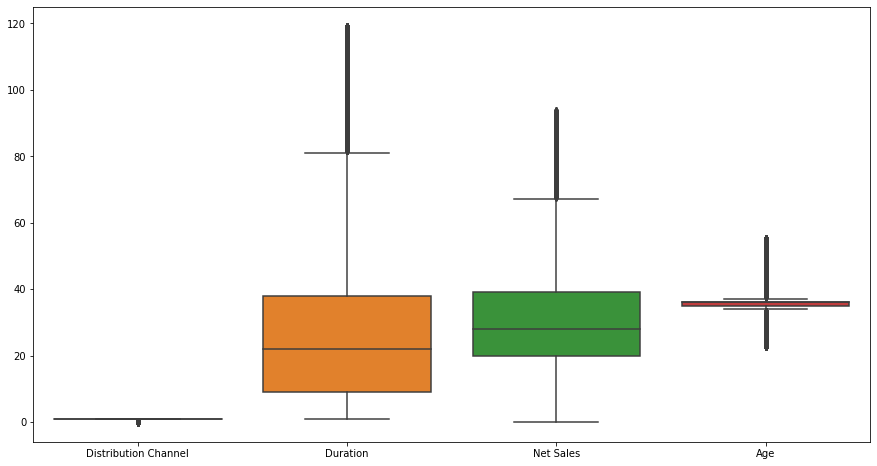

In [41]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df.drop(columns='Claim'))

In [42]:
df.describe()

,Distribution Channel,Claim,Duration,Net Sales,Age
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,0.982519,0.014639,28.456842,31.530981,36.832960
std,0.131056,0.120102,25.786913,19.103774,6.286455
min,0.000000,0.000000,1.000000,0.070000,23.000000
25%,1.000000,0.000000,9.000000,20.000000,35.000000
50%,1.000000,0.000000,22.000000,28.000000,36.000000
75%,1.000000,0.000000,38.000000,39.000000,36.000000
max,1.000000,1.000000,119.000000,93.600000,55.000000


In [43]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
0,CBH,Travel Agency,0,Comprehensive Plan,0,22.0,MALAYSIA,29.0,36.0
1,CBH,Travel Agency,0,Comprehensive Plan,0,22.0,MALAYSIA,29.0,36.0
2,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,65.0,AUSTRALIA,49.5,32.0
3,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,60.0,AUSTRALIA,39.6,32.0
4,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,0,79.0,ITALY,19.8,41.0


<h2><Handling Duration ouliers with  </h2>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  int64  
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  int64  
 5   Duration              63326 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Age                   63326 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.3+ MB


<AxesSubplot:>

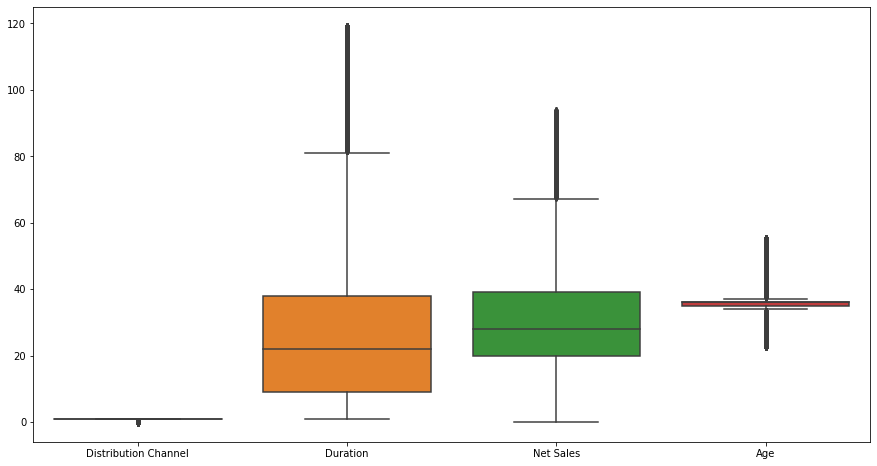

In [45]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df.drop(columns='Claim'))

<h2>Split Input data and Output Data</h2>

In [46]:
X = df.drop(columns='Claim')
y = df['Claim']

In [47]:
X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Age
0,CBH,Travel Agency,0,Comprehensive Plan,22.0,MALAYSIA,29.0,36.0
1,CBH,Travel Agency,0,Comprehensive Plan,22.0,MALAYSIA,29.0,36.0
2,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,65.0,AUSTRALIA,49.5,32.0
3,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,60.0,AUSTRALIA,39.6,32.0
4,CWT,Travel Agency,1,Rental Vehicle Excess Insurance,79.0,ITALY,19.8,41.0
...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,1,Basic Plan,111.0,JAPAN,35.0,31.0
63322,JZI,Airlines,1,Basic Plan,58.0,CHINA,40.0,40.0
63323,JZI,Airlines,1,Basic Plan,2.0,MALAYSIA,18.0,36.0
63324,JZI,Airlines,1,Basic Plan,3.0,VIET NAM,18.0,36.0


In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
63321    0
63322    0
63323    0
63324    0
63325    0
Name: Claim, Length: 63326, dtype: int64

<h2>Handling Categorical Data</h2>

In [49]:
X = pd.get_dummies(X,drop_first = True)
X

,Distribution Channel,Duration,Net Sales,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,0,22.0,29.0,36.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22.0,29.0,36.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,65.0,49.5,32.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,60.0,39.6,32.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,79.0,19.8,41.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,1,111.0,35.0,31.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63322,1,58.0,40.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63323,1,2.0,18.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63324,1,3.0,18.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<h2>split data into train and test</h2>

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 26, stratify= y)

In [51]:
y_train.value_counts()

0    49918
1      742
Name: Claim, dtype: int64

In [52]:
y_test.value_counts()

0    12481
1      185
Name: Claim, dtype: int64

In [64]:
x_train.duplicated().sum()

10375

In [65]:
#x_train.drop_duplicates()

,Distribution Channel,Duration,Net Sales,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
29580,1,3.0,22.0,48.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7505,1,11.0,59.4,31.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60131,1,27.0,33.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
630,1,16.0,28.0,36.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2638,1,12.0,52.0,36.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58421,1,87.0,20.0,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41505,1,99.0,64.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49684,1,16.0,49.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31536,1,6.0,69.3,31.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<h2>Handle Imbalance using SMOTE Over Sampling</h2>

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [54]:
y_train_smote.value_counts()

0    49918
1    49918
Name: Claim, dtype: int64

In [55]:
x_train_smote.duplicated().sum()

18388

<h2>Handle Imbalance Using Random Over Sampler</h2>

In [59]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
x_train_over ,y_train_over = os.fit_resample(x_train,y_train)

In [60]:
x_train_over

,Distribution Channel,Duration,Net Sales,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,1,3.0,22.0,48.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,59.4,31.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,27.0,33.0,36.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,16.0,28.0,36.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,12.0,52.0,36.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99831,1,14.0,62.0,26.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99832,1,15.0,42.0,26.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99833,1,27.0,18.5,28.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99834,1,32.0,81.5,40.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_train_over.value_counts()

0    49918
1    49918
Name: Claim, dtype: int64

In [63]:
x_train_over.duplicated().sum()

59551

<h2>Feature Scaling</h2>

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
x_train_scaled

,Distribution Channel,Duration,Net Sales,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,0.132110,-0.987361,-0.500083,1.774061,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
1,0.132110,-0.677058,1.457803,-0.929278,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,2.534521,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
2,0.132110,-0.056450,0.075766,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,6.092527,-0.004443,-0.007696,-0.007696
3,0.132110,-0.483118,-0.185983,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,6.860358,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
4,0.132110,-0.638270,1.070414,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,6.860358,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50655,0.132110,-0.793421,-0.604782,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
50656,0.132110,-0.909785,0.389865,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
50657,-7.569471,0.215066,-0.133634,2.410141,-0.074684,-0.387405,-0.039269,-0.054495,27.276363,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
50658,0.132110,-0.793421,-1.128281,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696


In [58]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = scaler.get_feature_names_out())
x_test_scaled

,Distribution Channel,Duration,Net Sales,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,0.13211,0.253854,0.939539,-1.724378,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,2.534521,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
1,0.13211,-0.638270,0.180466,1.774061,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
2,0.13211,-0.134026,-0.604782,-1.247318,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
3,0.13211,-0.560694,0.075766,1.615041,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,6.092527,-0.004443,-0.007696,-0.007696
4,0.13211,-0.521906,-0.604782,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12661,0.13211,-0.366754,1.855662,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
12662,0.13211,-0.560694,-0.185983,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,2.534521,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
12663,0.13211,1.068401,-0.185983,-0.134178,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,-0.204261,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
12664,0.13211,-0.754633,-1.128281,-0.770258,-0.074684,-0.387405,-0.039269,-0.054495,-0.036662,-0.394552,...,-0.145765,4.895709,-0.004443,-0.010884,-0.008886,-0.009935,-0.164136,-0.004443,-0.007696,-0.007696
